# Imports

In [20]:
import matplotlib.pyplot as plt
import re

# Results Parser

In [21]:
throughput_dict_five = {}
blocktime_dict_five = {}
throughput_dict_ten = {}
blocktime_dict_ten = {}

files_names_five= ['5node0.txt', '5node1.txt', '5node2.txt', '5node3.txt', '5node4.txt']
files_names_ten= ['10node0.txt', '10node1.txt', '10node2.txt', '10node3.txt', '10node4.txt', '10node5.txt', '10node6.txt', '10node7.txt', '10node8.txt', '10node9.txt']

for file in files_names_five:
    f = open('test/results/' +str(file), 'r')
    for line in f:
        line = line.strip()
        if line.startswith('Throughput'):
            throughput = float(line.split(': ')[1])
        elif line.startswith('Block time'):
            block_time = float(line.split(': ')[1])
        elif line.startswith('Capacity'):
            capacity = int(line.split(': ')[1])
        elif line.startswith('Difficulty'):
            difficulty = int(line.split(': ')[1])
            key = str((capacity, difficulty))
            if key not in throughput_dict_five:
                throughput_dict_five[key] = throughput
                blocktime_dict_five[key] = block_time
            else:
                throughput_dict_five[key] += throughput
                blocktime_dict_five[key] += block_time

for file2 in files_names_ten:
    f = open('test/results/' +str(file2), 'r')
    for line in f:
        line = line.strip()
        if line.startswith('Throughput'):
            throughput = float(line.split(': ')[1])
        elif line.startswith('Block time'):
            block_time = float(line.split(': ')[1])
        elif line.startswith('Capacity'):
            capacity = int(line.split(': ')[1])
        elif line.startswith('Difficulty'):
            difficulty = int(line.split(': ')[1])
            key = str((capacity, difficulty))
            if key not in throughput_dict_ten:
                throughput_dict_ten[key] = throughput
                blocktime_dict_ten[key] = block_time
            else:
                throughput_dict_ten[key] += throughput
                blocktime_dict_ten[key] += block_time
                    

for key in throughput_dict_five:
    throughput_dict_five[key] /= 5
    blocktime_dict_five[key] /= 5

for key in throughput_dict_ten:
    throughput_dict_ten[key] /= 10
    blocktime_dict_ten[key] /= 10

# sort the dictionary by key
throughput_dict_five = dict(sorted(throughput_dict_five.items(), key=lambda x: tuple(map(int, reversed(x[0][1:-1].split(','))))))
blocktime_dict_five = dict(sorted(blocktime_dict_five.items(), key=lambda x: tuple(map(int, reversed(x[0][1:-1].split(','))))))
throughput_dict_ten = dict(sorted(throughput_dict_ten.items(), key=lambda x: tuple(map(int, reversed(x[0][1:-1].split(','))))))
blocktime_dict_ten = dict(sorted(blocktime_dict_ten.items(), key=lambda x: tuple(map(int, reversed(x[0][1:-1].split(','))))))

# Capacity and Difficulty

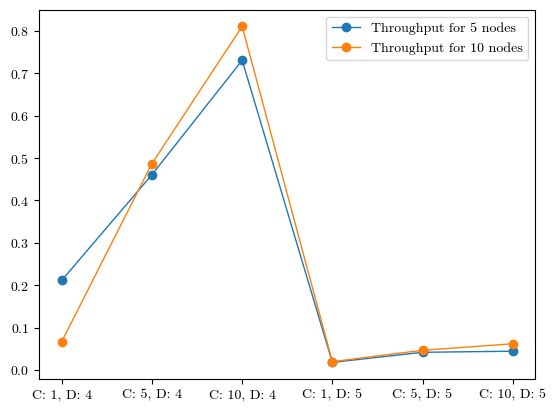

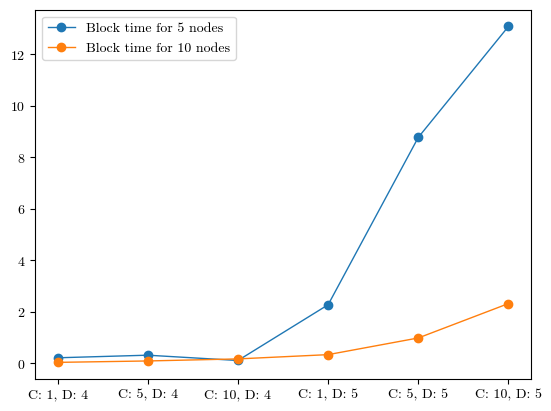

In [22]:
custom_labels = []

for key in throughput_dict_five.keys():
    integers = re.findall(r"\d+", key)
    label = 'C: ' + integers[0] + ', D: ' + integers[1]
    custom_labels.append(label)

# plot the two throughput dictionaries on the same graph
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
x = list(custom_labels)
y = list(throughput_dict_five.values())
plt.plot(x, y, marker = 'o', color = 'tab:blue', linewidth = 1)
x = list(custom_labels)
y = list(throughput_dict_ten.values())
plt.plot(x, y, marker = 'o', color = 'tab:orange', linewidth = 1)
plt.legend(['Throughput for 5 nodes', 'Throughput for 10 nodes'])
plt.show()

# plot the two block time dictionaries on the same graph
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
x = list(custom_labels)
y = list(blocktime_dict_five.values())
plt.plot(x, y, marker = 'o', color = 'tab:blue', linewidth = 1)
x = list(custom_labels)
y = list(blocktime_dict_ten.values())
plt.plot(x, y, marker = 'o',  color = 'tab:orange', linewidth = 1)
plt.legend(['Block time for 5 nodes', 'Block time for 10 nodes'])
plt.show()

# Number of Nodes

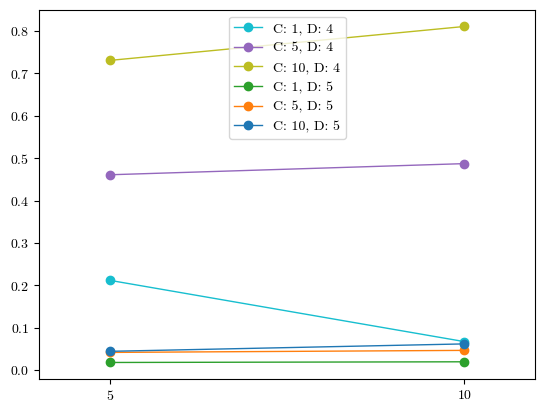

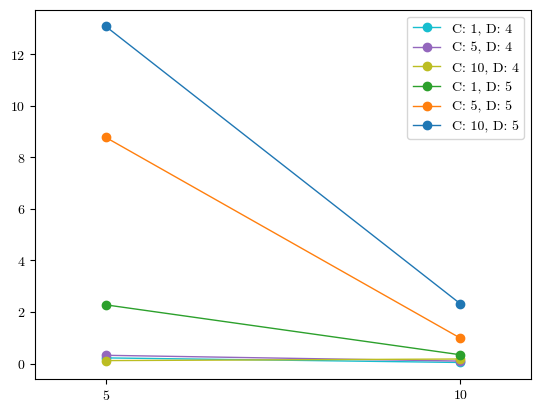

In [23]:
colors = 2 * ['tab:blue', 'tab:orange', 'tab:green', 'tab:olive', 'tab:purple', 'tab:cyan']

# plot the throughput for each key in the throughput_dict_five and throughput_dict_ten
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
for key in throughput_dict_five:
    x = [5, 10]
    y = [throughput_dict_five[key], throughput_dict_ten[key]]
    plt.plot(x, y, marker = 'o', linewidth = 1, color = colors.pop())
    plt.legend(custom_labels)
plt.xticks([5, 10])
plt.xlim(4,11)
plt.show()

# plot the block time for each key in the blocktime_dict_five and blocktime_dict_ten
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
for key in blocktime_dict_five:
    x = [5, 10]
    y = [blocktime_dict_five[key], blocktime_dict_ten[key]]
    plt.plot(x, y, marker = 'o', linewidth = 1, color = colors.pop())
    plt.legend(custom_labels)
plt.xticks([5, 10])
plt.xlim(4,11)
plt.show()